# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':[8,8]},font_scale=1.3)

# Read File and view data details

In [2]:
black_friday = pd.read_csv('black_friday.csv')

In [3]:
black_friday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
black_friday['Product_ID'] = black_friday['Product_ID'].apply(lambda x : x.split('P')[-1])

In [5]:
black_friday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [6]:
black_friday.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


# 1.Data Cleansing
**check for any missing indicators, NAN Values and any weird data**

In [7]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Dtypes are good , NAN values are only in Product_Category_2 & Product_Category_3**

In [8]:
black_friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
black_friday.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [10]:
black_friday['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [11]:
for col in black_friday.columns:
    print(black_friday[col].value_counts())
    print('*' * 50)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
**************************************************
00265242    1880
00025442    1615
00110742    1612
00112142    1562
00057642    1470
            ... 
00357542       1
00106342       1
00160742       1
00065542       1
00206242       1
Name: Product_ID, Length: 3631, dtype: int64
**************************************************
M    414259
F    135809
Name: Gender, dtype: int64
**************************************************
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
**************************************************
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5  

No Weird Data or missing indicators

# 2.Fill Missing Data

In [12]:
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Fill Product_Category_2 & Product_Category_3 using Simple Imputer 

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='most_frequent')

In [15]:
black_friday[['Product_Category_2','Product_Category_3']] = imputer.fit_transform(black_friday[['Product_Category_2','Product_Category_3']])

In [16]:
imputer.statistics_

array([ 8., 16.])

In [17]:
black_friday.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# 3.Data Analysis

In [18]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


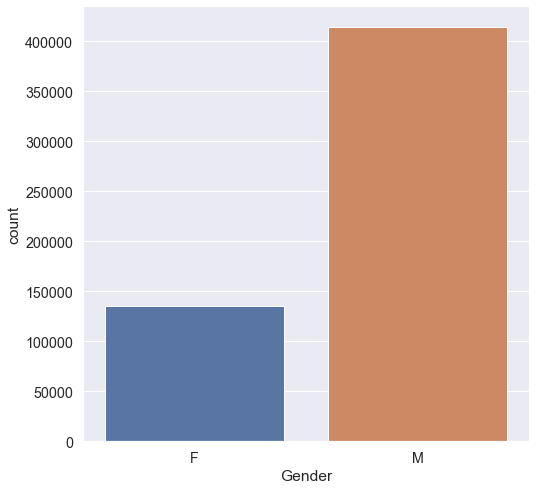

In [19]:
sns.countplot(black_friday['Gender'])

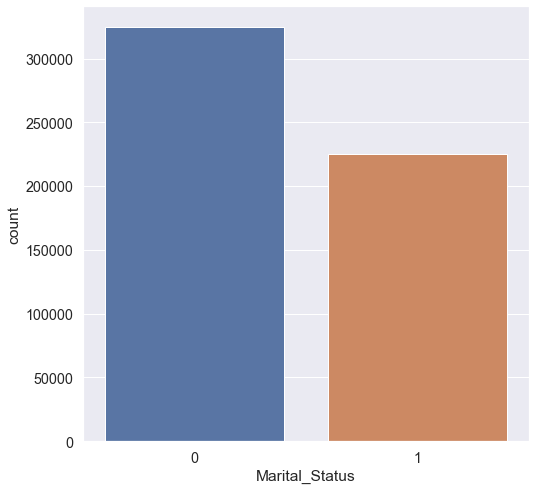

In [20]:
sns.countplot(black_friday['Marital_Status'])

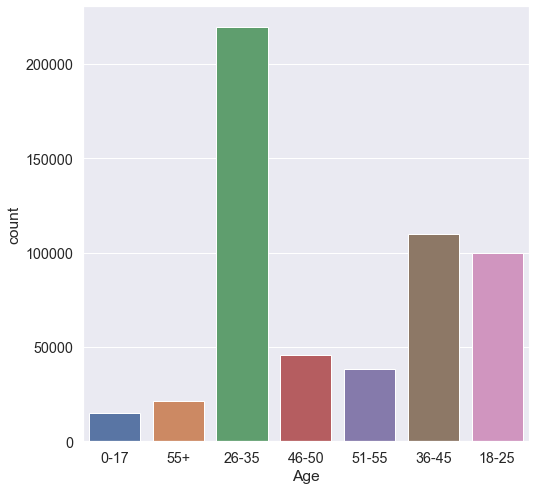

In [21]:
sns.countplot(black_friday['Age'])

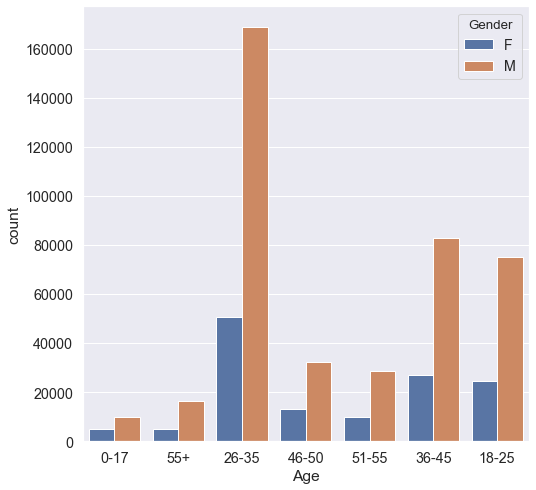

In [22]:
sns.countplot(black_friday['Age'],hue=black_friday['Gender'])

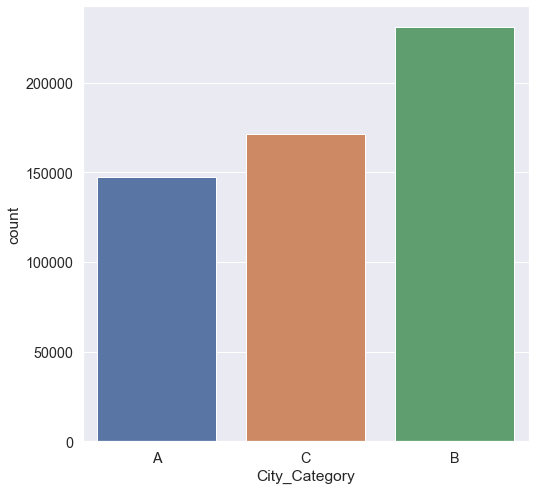

In [23]:
sns.countplot(black_friday['City_Category'])

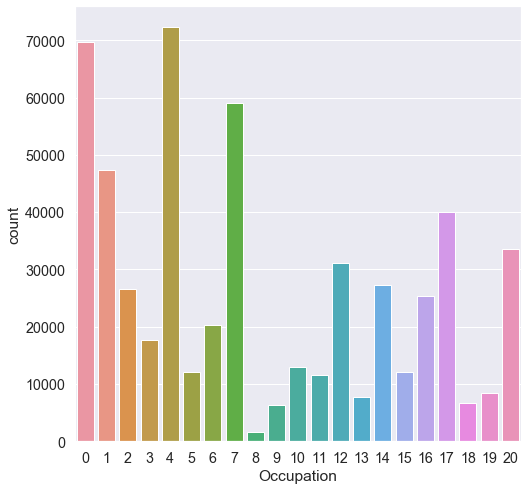

In [24]:
sns.countplot(black_friday['Occupation'])

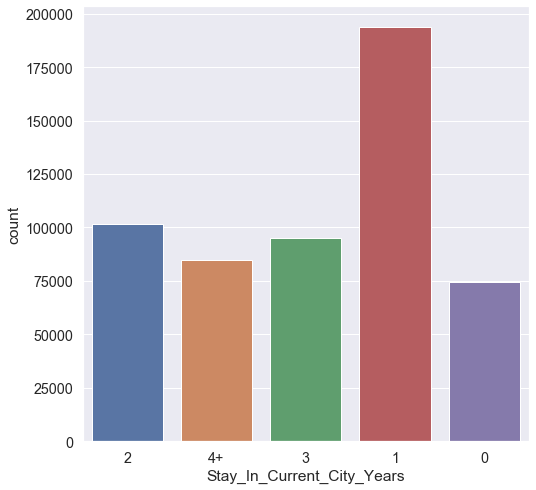

In [25]:
sns.countplot(black_friday['Stay_In_Current_City_Years'])

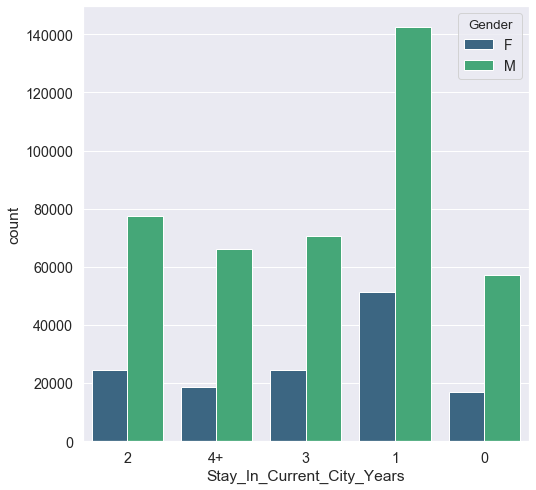

In [26]:
sns.countplot(data=black_friday,x='Stay_In_Current_City_Years',hue='Gender',palette='viridis')

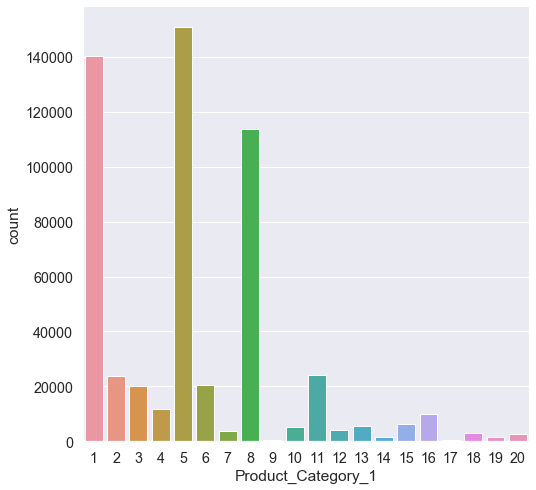

In [27]:
sns.countplot(black_friday['Product_Category_1'])

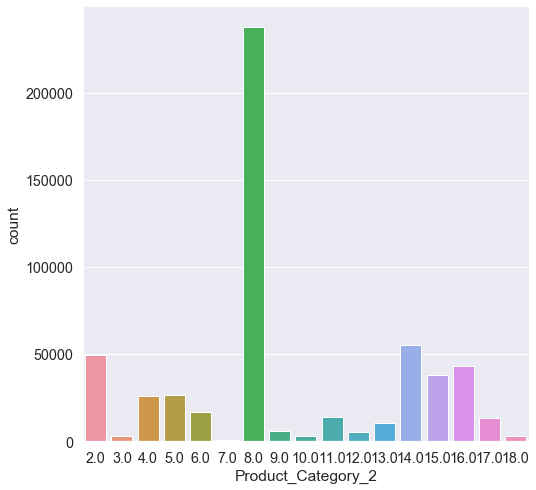

In [28]:
sns.countplot(black_friday['Product_Category_2'])

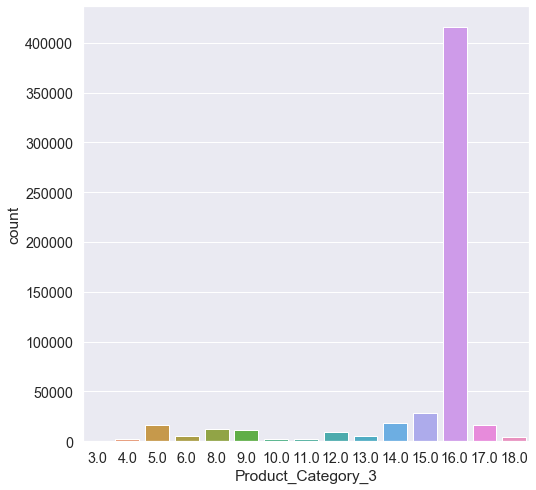

In [29]:
sns.countplot(black_friday['Product_Category_3'])

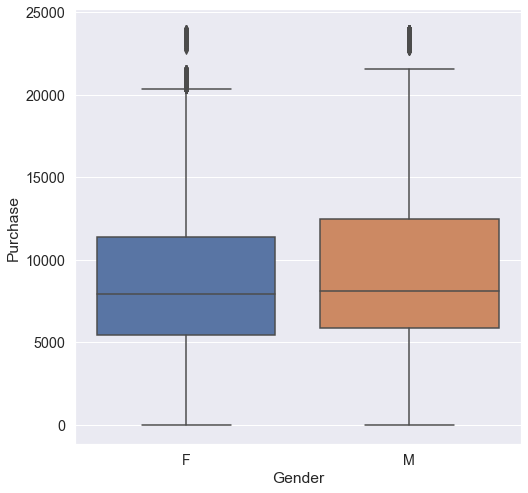

In [30]:
sns.boxplot(x=black_friday['Gender'],y=black_friday['Purchase'])

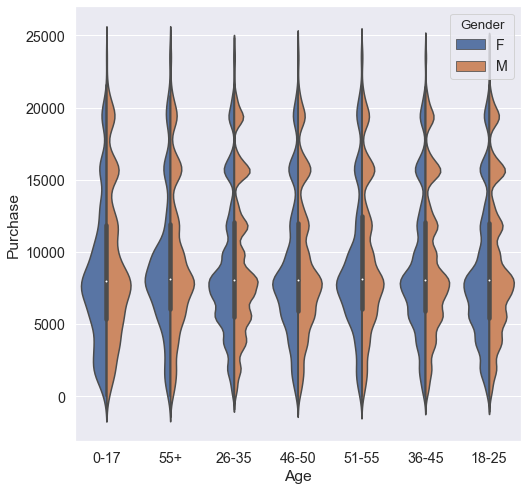

In [31]:
sns.violinplot(x=black_friday['Age'],y=black_friday['Purchase'],hue=black_friday['Gender'],split=True)

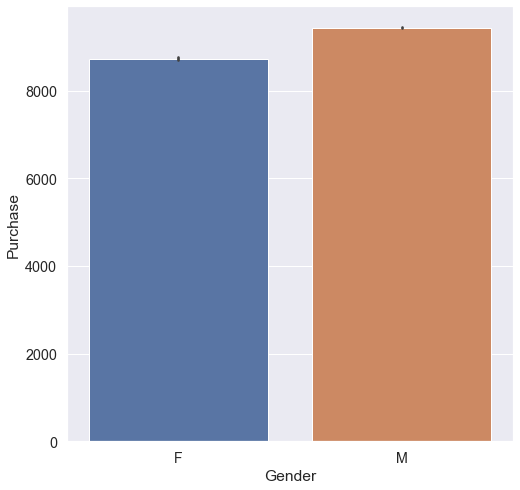

In [32]:
sns.barplot(x=black_friday['Gender'],y=black_friday['Purchase'])

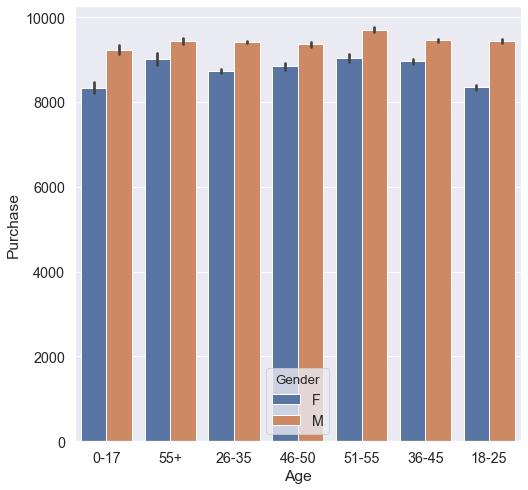

In [33]:
sns.barplot(x=black_friday['Age'],y=black_friday['Purchase'],hue=black_friday['Gender'])

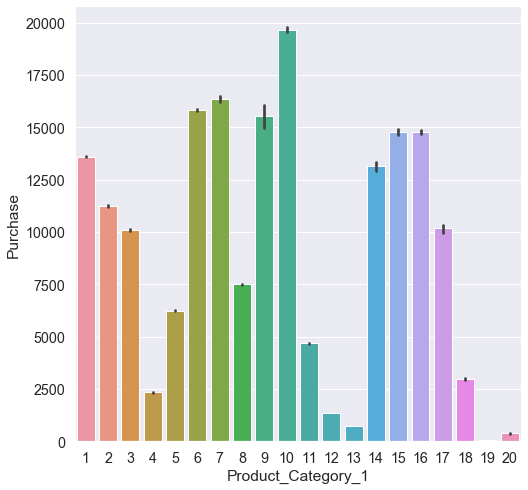

In [34]:
sns.barplot(data=black_friday,x='Product_Category_1',y='Purchase')

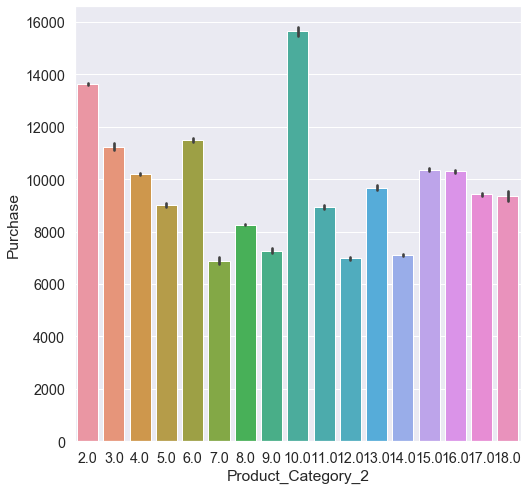

In [35]:
sns.barplot(data=black_friday,x='Product_Category_2',y='Purchase')

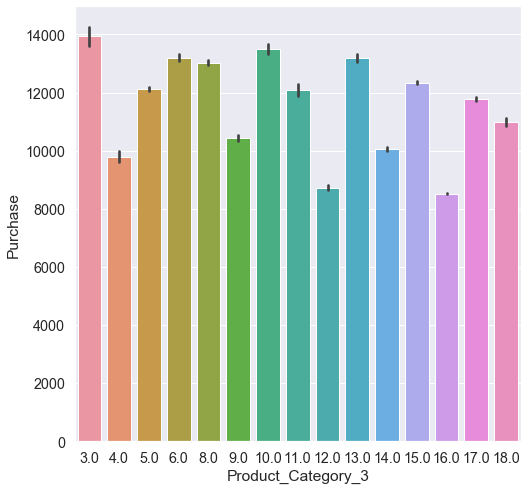

In [36]:
sns.barplot(data=black_friday,x='Product_Category_3',y='Purchase')

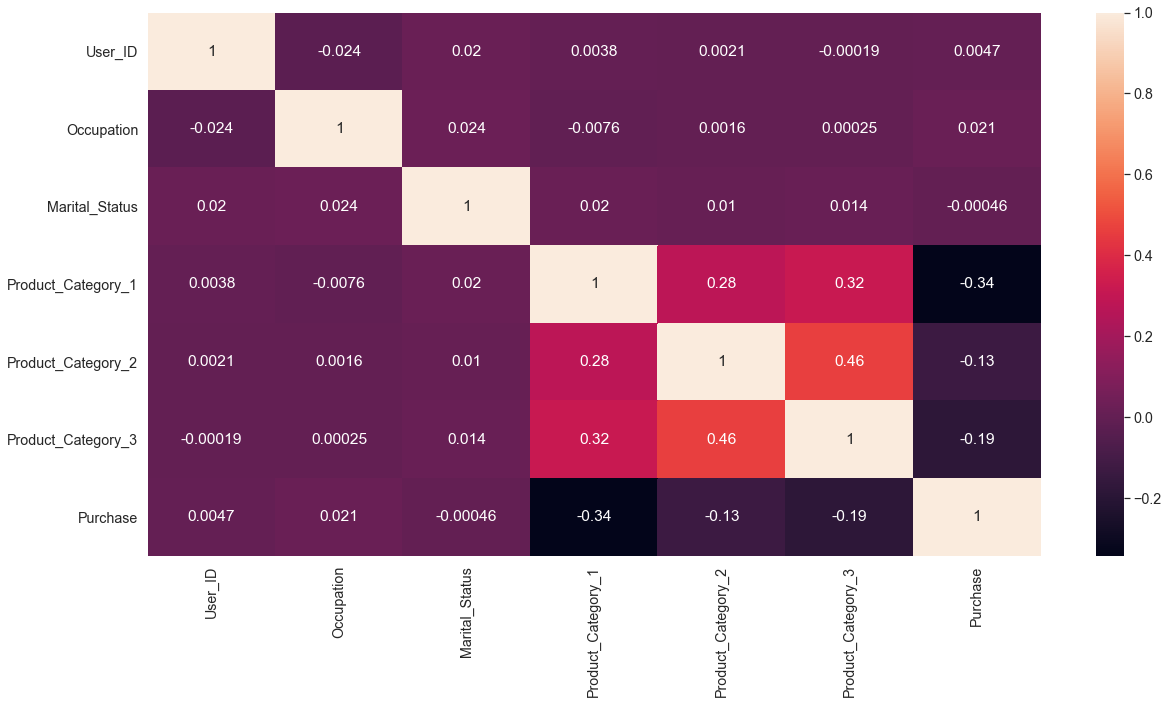

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(black_friday.corr(),annot=True)

Positive Correlation between : (Product_Category_1 , Product_Category_2)  
slightly Positive Correlation between : (Product_Category_1 , Product_Category_3)  
slightly negative Correlation between : (Product_Category_1 , Purchase)  
Positive Correlation between : (Product_Category_2 , Product_Category_3)  
slightly negative Correlation between : (Product_Category_2 , Purchase)

# 4.Categorical Data

In [18]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


**Categorical Data**   
1. Ordinal (Need Mapping)
    1. Stay_In_Current_City_Years  
    
2. Ordinal (Already Mapped)
    1. Occupation
    2. Marital_Status
    3. Product_Category_1
    4. Product_Category_2
    5. Product_Category_3
    
3. Nominal
    1. Age
    2. Gender
    3. City_Category

In [19]:
black_friday['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
Stay_In_Current_City_Years_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}
#will change only 4+ to 4 to use it later in machine learning

# apply using map
black_friday['Stay_In_Current_City_Years'] = black_friday['Stay_In_Current_City_Years'].map(Stay_In_Current_City_Years_dict)

In [21]:
black_friday = pd.get_dummies(black_friday, columns=['Age', 'Gender', 'City_Category'], drop_first=True)

In [22]:
black_friday

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_M,City_Category_B,City_Category_C
0,1000001,00069042,10,2,0,3,8.0,16.0,8370,0,0,0,0,0,0,0,0,0
1,1000001,00248942,10,2,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0
2,1000001,00087842,10,2,0,12,8.0,16.0,1422,0,0,0,0,0,0,0,0,0
3,1000001,00085442,10,2,0,12,14.0,16.0,1057,0,0,0,0,0,0,0,0,0
4,1000002,00285442,16,4,0,8,8.0,16.0,7969,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,00372445,13,1,1,20,8.0,16.0,368,0,0,0,0,1,0,1,1,0
550064,1006035,00375436,1,3,0,20,8.0,16.0,371,0,1,0,0,0,0,0,0,1
550065,1006036,00375436,15,4,1,20,8.0,16.0,137,0,1,0,0,0,0,0,1,0
550066,1006038,00375436,1,2,0,20,8.0,16.0,365,0,0,0,0,0,1,0,0,1


# 5.Split Data

**drop unwanted columns**

In [23]:
black_friday.drop(['User_ID','Product_ID'],inplace=True,axis=1)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = black_friday.drop('Purchase',axis=1)
y = black_friday['Purchase']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [27]:
print(X_train.shape , X_test.shape , y_train.shape, y_test.shape)

(440054, 15) (110014, 15) (440054,) (110014,)


# 6.Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()

In [30]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)